In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import lightkurve as lk
import numpy as np

In [2]:
TIC = 'TIC 243641947'

sector_data = lk.search_lightcurve(TIC, author="TESS-SPOC", exptime=600)

lc = sector_data.download()

<IPython.core.display.Javascript object>


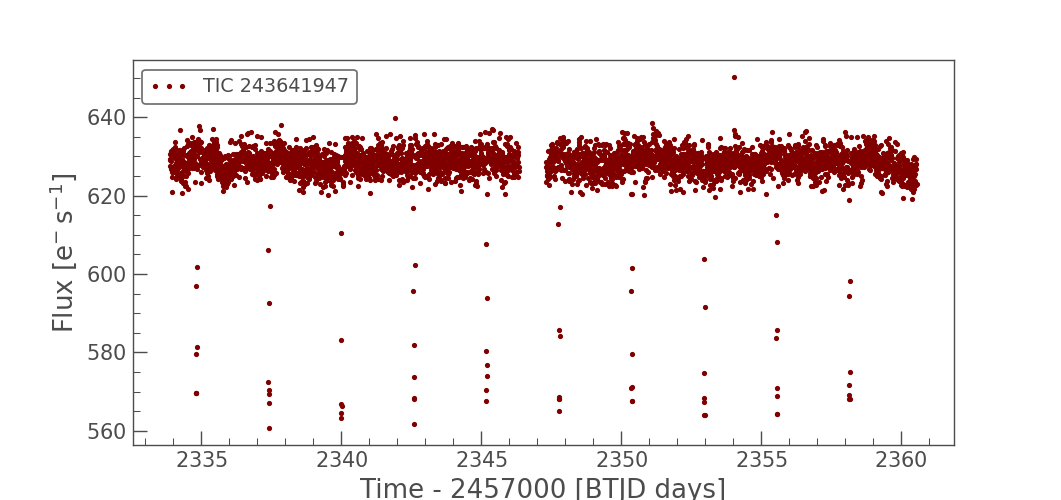

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

In [3]:
lc.plot(lw = 0, color = 'maroon', marker = 'o')

In [4]:
def odd_even_phase(lc, period, t0, plot_size = False, same_axes = False, binning = False):
    
    lc = lc.normalize()
    
    if binning != False:
        lc = lc.bin(binning/60/24) # you can change the binning factor here if you like
    time = lc.time.value
    flux = lc.flux.value
    
    t0_odd = t0
    t0_even = t0 + period
    period = period*2
    
    phase_odd = np.array([-0.5+( ( t - t0_odd-0.5*period) % period) / period for t in time])
    phase_even = np.array([-0.5+( ( t - t0_even-0.5*period) % period) / period for t in time])

    if same_axes == False:
        fig, ax = plt.subplots(1,2, figsize = (10,4), sharey = True)
        
        ax[0].plot(phase_odd, flux, lw = 0, color = 'navy', marker = '.', alpha =0.4)
        ax[1].plot(phase_even, flux, lw = 0, color = 'maroon', marker = '.', alpha =0.4)
        
        ax[0].set_xlabel("Phase")
        ax[0].set_ylabel("Normalized flux")
        ax[1].set_xlabel("Phase")
        
        ax[0].annotate("ODD", (0.3, np.nanmin(flux)), fontsize = 14)
        ax[1].annotate("EVEN", (0.3, np.nanmin(flux)), fontsize = 14)
    
        plt.subplots_adjust(wspace=0.02)
        
        if plot_size != False:
            ax[0].set_xlim(-plot_size, plot_size)
            ax[1].set_xlim(-plot_size, plot_size)
    else:
        fig, ax = plt.subplots(figsize = (4,4))
        
        ax.plot(phase_odd, flux, lw = 0, color = 'navy', marker = '.', alpha =0.4, label = 'odd')
        ax.plot(phase_even, flux, lw = 0, color = 'maroon', marker = '.', alpha =0.4, label = 'even')
        
        ax.set_xlabel("Phase")
        ax.set_ylabel("Normalized flux")
        
        plt.legend()
            
        if plot_size != False:
            ax.set_xlim(-plot_size, plot_size)


## Parameters we can change for the plotting: 

- **lc**: the lightcurve extracted using the lightkurve took (required)
- **period**: period of the signal, i.e. time between consecutive dips (required)
- **t0**: time of one of the transit-events (required)
- **plot_size**: ± x axis limits (to zoom in on the time of the transit)
- **same_axes**: plot the odd and even transits on the same figure
- **binning**: number of minutes you want to bin the data to


<IPython.core.display.Javascript object>


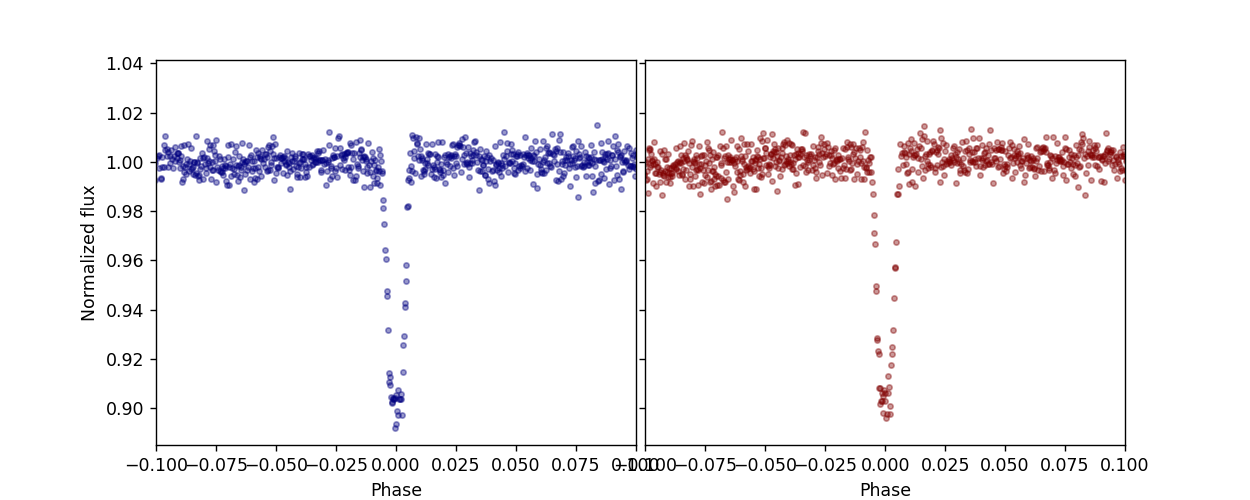

In [5]:
period = 2.592493924939249350
t0 = 2337.40660622469

odd_even_phase(lc, period, t0, plot_size = 0.1)

In [6]:
TIC = 'TIC 243641947'

sector_data = lk.search_lightcurve(TIC, author="TESS-SPOC", exptime=600)

lc = sector_data.download()

<IPython.core.display.Javascript object>


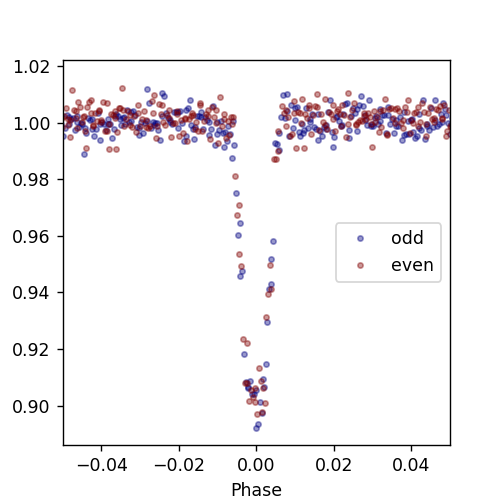

In [7]:
period = 2.592493924939249350
t0 = 2337.40660622469

odd_even_phase(lc, period, t0, plot_size = 0.05,  same_axes = True, binning = 15)

In [ ]:
lk.show_citation_instructions()